# Tucker Decomposition

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorly.decomposition import tucker
import ThingsWeDoALot as th

Box1List = []
Box2List = []
Box3List = []
Box4List = []

SpectraMatrixRows = open('data files/SpectraMatrix.csv', 'r').read().split(sep='\n')
for row in SpectraMatrixRows:
    entry = row.split(sep=',')
    for i in range(441):
        column = i * 4
        Box1List.append(float(entry[column]))
        Box2List.append(float(entry[column + 1]))
        Box3List.append(float(entry[column + 2]))
        Box4List.append(float(entry[column + 3]))

# Creating AllBoxes, which is a huge list of all SpectraMatrix data for easy tensor creation
AllBoxes = Box1List + Box2List + Box3List + Box4List

theTensor = np.array(AllBoxes).reshape((4, 200, 441))  # The tensor, in the proper shape, that we hope to do CPT on

## Creating the Tucker Decomposition

Upon doing ```tensorly.decomposition.tucker()``` on our
tensor, it returns an object with two arrays. The first is a (4, 4, 4) array which seems
to be equivalent to the weights from CPT; the second, 3 matrices
which seem analogous to the factors from CPT, with the same
dimensions.

In [23]:
tensorrank = 4  # Note: a value larger than 4 requires 58 Gb of memory

theCPT = tucker(theTensor, rank=tensorrank)
print(f'Object has length {len(theCPT)}')

Object has length 2


What follows is an attempt to burrow into the
arrays to determine what they're
composed of.

We proceed with ```rank=4```.

### First, the first array:

In [24]:
array1 = theCPT[0]
print(f'array1 is a {type(array1)}')
print(f'array1 is {array1.size} entries long with dimensions: {array1.shape}')

for i in range(len(array1)):
    print(f'Slice {i + 1} is {array1[i]}, a {type(array1[i])}')

array1 is a <class 'numpy.ndarray'>
array1 is 64 entries long with dimensions: (4, 4, 4)
Slice 1 is [[ 1.44529393e-05  1.53990055e-07 -3.37800962e-08  2.77385207e-08]
 [-5.29581740e-07 -3.16533809e-06 -1.85448230e-07  3.92245747e-07]
 [ 9.63520012e-08 -9.06600393e-07  1.81922129e-07  1.01753647e-08]
 [-1.04580412e-07  7.35511033e-07 -2.79851433e-07 -9.83505391e-08]], a <class 'numpy.ndarray'>
Slice 2 is [[-6.30983989e-07 -2.32721539e-06 -4.06615362e-07 -9.58051222e-08]
 [ 9.74003837e-07 -3.63624126e-06 -3.27438768e-07 -2.09519505e-07]
 [-1.95584808e-07  9.62619095e-07 -1.47226125e-07  4.72928369e-08]
 [ 1.04171800e-07 -6.54417490e-07  3.43667734e-07 -4.72723708e-09]], a <class 'numpy.ndarray'>
Slice 3 is [[ 1.80868741e-07  3.45549786e-07 -4.04812728e-08  2.10789934e-08]
 [-6.82048133e-08  2.92234517e-07 -7.70175579e-08  2.66561189e-08]
 [-4.87062652e-07  2.46727598e-06 -4.64207630e-07  1.07443956e-07]
 [-9.68892990e-08  6.32003538e-07 -3.10663221e-07 -1.17917507e-09]], a <class 'numpy.

### Now, the factors:

In [25]:
array2 = theCPT[1]
print(f'array2 is a {type(array2)}')
print(f'array2 is {len(array2)} long. Let\'s call these "factors."')
factor1 = array2[0]
factor2 = array2[1]
factor3 = array2[2]

print(f'Factor 1 dimensions: {factor1.shape}')
print(f'Factor 2 dimensions: {factor2.shape}')
print(f'Factor 3 dimensions: {factor3.shape}')

array2 is a <class 'list'>
array2 is 3 long. Let's call these "factors."
Factor 1 dimensions: (4, 4)
Factor 2 dimensions: (200, 4)
Factor 3 dimensions: (441, 4)


## Exploring the Factors

Clearly factor 1 describes the boxes; factor 2, the photon
energies; and factor 3, the sensors. We know this because
the row lengths are 4, 200, and 441, respectively.

But what do each of these factors *look* like?

### Factor 1

Each column in factor 1, when graphed, looks like:

Text(0, 0.5, 'Value After Decomposition')

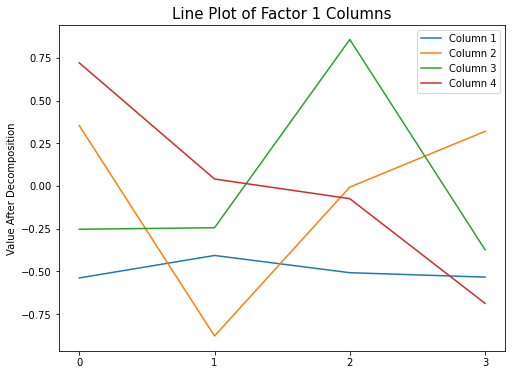

In [26]:
# Creating a dataframe of factor 1 with an x-axis of Box labels.
initialfactor1dataframe = pd.DataFrame(data=factor1)
# factor1dataframeXAxis = pd.DataFrame(data={'labels': ['Box 1', 'Box 2', 'Box 3', 'Box 4']})
# factor1dataframe = pd.concat((initialfactor1dataframe, factor1dataframeXAxis),
#                              axis=1)\
#                      .set_index('labels')

plt.figure(figsize=(8, 6))
for j in range(tensorrank):
    plt.plot(initialfactor1dataframe.iloc[:, j],
             label=f'Column {j + 1}')

plt.title(label='Line Plot of Factor 1 Columns', fontsize=15)
plt.legend()
plt.xticks(ticks=[0, 1, 2, 3])
plt.ylabel('Value After Decomposition')
# th.saveThisGraph('images/CPT images/Factor1.png')

### Factor 2

Each column in factor 2, when graphed, looks like this:

Text(0, 0.5, 'Value After Decomposition')

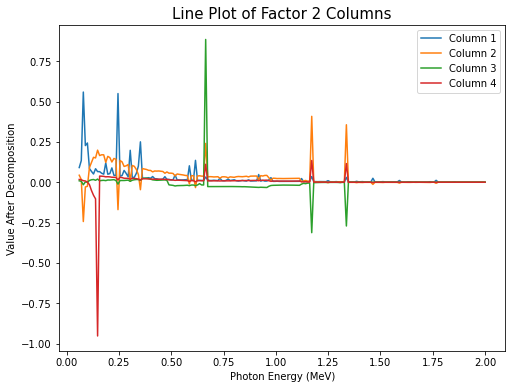

In [27]:
initialfactor2dataframe = pd.DataFrame(data=factor2)
factor2dataframe = th.attachXAxis(dataframe=initialfactor2dataframe)

plt.figure(figsize=(8, 6))
for k in range(tensorrank):
    plt.plot(factor2dataframe.iloc[:, k], label=f'Column {k + 1}')

plt.title(label='Line Plot of Factor 2 Columns', fontsize=15)
plt.legend()
plt.xlabel('Photon Energy (MeV)')
plt.ylabel('Value After Decomposition')
# th.saveThisGraph('images/CPT images/Factor2.png')

### Factor 3

Each column in factor 3, when graphed, looks like this:

Text(0, 0.5, 'Value After Decomposition')

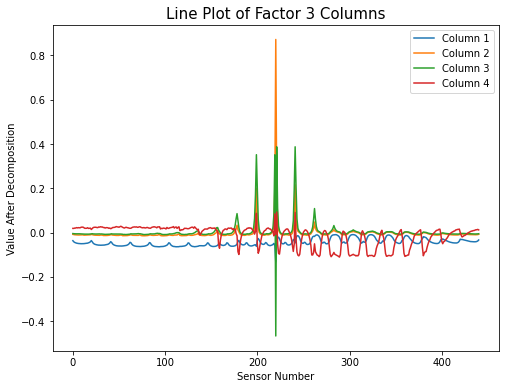

In [28]:
factor3dataframe = pd.DataFrame(data=factor3)

plt.figure(figsize=(8, 6))
for m in range(tensorrank):
    plt.plot(factor3dataframe.iloc[:, m], label=f'Column {m + 1}')

plt.title(label='Line Plot of Factor 3 Columns', fontsize=15)
plt.legend()
plt.xlabel('Sensor Number')
plt.ylabel('Value After Decomposition')
# th.saveThisGraph('images/CPT images/Factor3.png')

# The code below plots the columns individually:

# for m in range(tensorrank):
#     th.linePlotTheThing(dataframetoplot=factor3dataframe,
#                         columntoplot=m,
#                         xaxislabel='Sensor Number',
#                         yaxislabel='Value After Decomposition',
#                         title='Line Plot of Factor 3 Columns',
#                         figuredimensions=(8, 6))

## Conclusions

The results seem analogous to CPT, with the distinction
that weights in tucker decomposition are a 3-way
tensor rather than a list.